    Nama  : Bima Pratama Anom
    NIM   : 09011181722009
    MK    : Kecerdasan Buatan
    Dosen : Prof.Dr.Ir. Siti Nurmaini

<h1> <center>Fuzzy Logic (Perancangan Manajemen Bandwidth Internet) </center></h1>

Dalam perancangan manajemen bandwidth. Tujuan yang dicapai adalah untuk mengoptimal pemakaian akses internet. Input sistem berupa akses internet saat itu (real time). Dalam proses fuzzy input dibagi menjadi 2 variabel yaitu kecepatan browsing dan kecepatan download. Akses ini tidak melihat kecepatan per user tetapi kecepatan total user dari masing-masing variable. Himpunan fuzzy yang digunakan adalah sangat rendah, rendah, normal
dan tinggi. Output sistem adalah maksimal (max limit) dari browsing, download, dan streaming.

In [17]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [18]:
browsing = np.arange(1,2001,1)
download = np.arange(1,2001,1)

Input Variabel :

Domain himpunan Fuzzy untuk variabel browsing:
- sangat Rendah = [1 - 750]
- rendah = [500-1000] 
- normal = [750-1500]
- tinggi = [1000-2000]


Domain himpunan Fuzzy untuk variabel download:
- sangat Rendah = [1 - 750]
- rendah = [500-1000] 
- normal = [750-1500]
- tinggi = [1000-2000]


Domain himpunan Fuzzy untuk limit browsing:
- sangat Rendah = [1 - 750]
- rendah = [500-1000] 
- normal = [750-1500]
- tinggi = [1000-2000]


Domain himpunan Fuzzy untuk limit download:
- sangat Rendah = [1 - 750]
- rendah = [500-1000] 
- normal = [750-1500]
- tinggi = [1000-2000]

\begin{equation}
 \mu ['Sangat Rendah'](x) = \begin{cases}
    1, & \text{$x\leq500$}.\\
    (750 - x)/(750 - 500) , & \text{$500 \leq x \leq 750$}.\\
    0, & \text{$x\geq 750$}. \\
  \end{cases}
  \\
  \mu['Rendah'](x)=\begin{cases}
    0, & \text{$x\leq 500 $ atau $x\geq1000$}.\\
    (x - 500)/(750 - 500) , & \text{$500 \leq x \leq 750$}.\\
    (1000 - x)/(1000 - 750) , & \text{$750 \leq x \leq 1000$} \\
  \end{cases}
  \\
  \mu['Normal'](x)=\begin{cases}
    0, & \text{$x\leq 500$ atau $x\geq1500$}.\\
    (x - 750)/(1000 - 750) , & \text{$750 \leq x \leq 1000$}.\\
    (1500 - x)/(1500 - 1000) , & \text{$1000 \leq x \leq 1500$}.\\
  \end{cases}
  \\
  \mu ['Tinggi'](x)=\begin{cases}
    0, & \text{$x\leq 1000$}.\\
    (x - 1000)/(1500 - 1000) , & \text{$1000 \leq x \leq 1500$}.\\
    1, & \text{$x\geq 2000$}.
  \end{cases}
\end{equation}


### Menampilkan plot membership function dari Browsing 

In [19]:
br_sangatrendah = fuzz.trapmf(browsing, [1,1,500,750])
br_rendah = fuzz.trimf(browsing, [500,750,1000])
br_normal = fuzz.trimf(browsing, [750,1000,1500])
br_tinggi = fuzz.trapmf(browsing, [1000,1500,2000,2000])

Text(0.5,1,'tinggi')

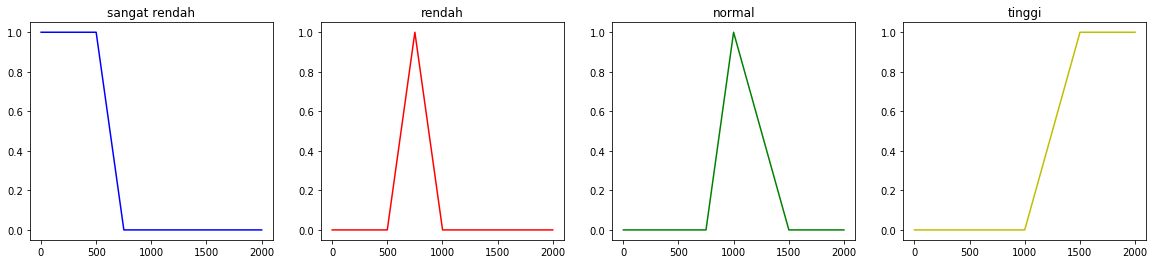

In [20]:
fig, (ax0, ax1, ax2,ax3) = plt.subplots(ncols=4, figsize=(20,4))
ax0.plot(browsing, br_sangatrendah, 'b', linewidth=1.5, label='sangat rendah')
ax1.plot(browsing, br_rendah, 'r', linewidth=1.5, label='rendah')
ax2.plot(browsing, br_normal, 'g', linewidth=1.5, label='normal')
ax3.plot(browsing, br_tinggi, 'y', linewidth=1.5, label='tinggi')
ax0.set_title('sangat rendah')
ax1.set_title('rendah')
ax2.set_title('normal')
ax3.set_title('tinggi')

### Menampilkan plot membership function dari Download

In [22]:
dw_sangatrendah = fuzz.trapmf(download, [1,1,500,750])
dw_rendah = fuzz.trimf(download, [500,750,1000])
dw_normal = fuzz.trimf(download, [750,1000,1500])
dw_tinggi = fuzz.trapmf(download, [1000,1500,2000,2000])

Text(0.5,1,'tinggi')

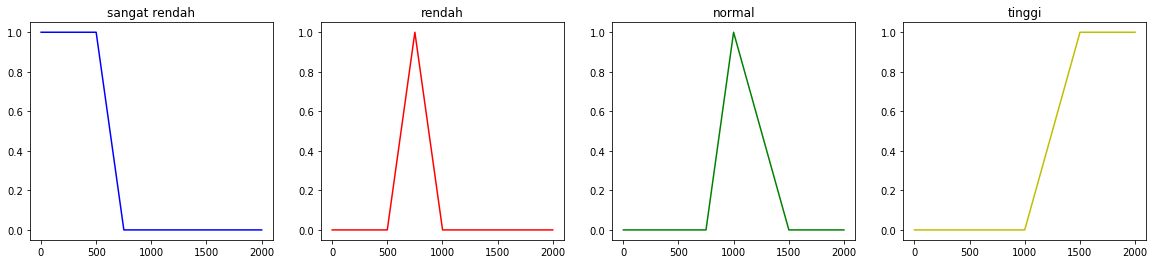

In [23]:
fig, (ax0, ax1, ax2,ax3) = plt.subplots(ncols=4, figsize=(20,4))
ax0.plot(download, dw_sangatrendah, 'b', linewidth=1.5, label='sangat rendah')
ax1.plot(download, dw_rendah, 'r', linewidth=1.5, label='rendah')
ax2.plot(download, dw_normal, 'g', linewidth=1.5, label='normal')
ax3.plot(download, dw_tinggi, 'y', linewidth=1.5, label='tinggi')
ax0.set_title('sangat rendah')
ax1.set_title('rendah')
ax2.set_title('normal')
ax3.set_title('tinggi')

# Fuzzifikasi

In [24]:
browsing = ctrl.Antecedent(np.arange(1,2001,1), 'browsing')
download = ctrl.Antecedent(np.arange(1,2001,1), 'download')
limitbrowsing = ctrl.Consequent(np.arange(1,2001,1), 'limitbrowsing')
limitdownload = ctrl.Consequent(np.arange(1,2001,1), 'limitdownload')

##### Membership Function untuk variabel input: 

In [25]:
browsing['sangat rendah'] = fuzz.trapmf(browsing.universe, [1,1,500,750])
browsing['rendah'] = fuzz.trimf(browsing.universe, [500,750,1000])
browsing['normal'] = fuzz.trimf(browsing.universe, [750,1000,1500])
browsing['tinggi'] = fuzz.trapmf(browsing.universe, [1000,1500,2000,2000])

download['sangat rendah'] = fuzz.trapmf(download.universe, [1,1,500,750])
download['rendah'] = fuzz.trimf(download.universe, [500,750,1000])
download['normal'] = fuzz.trimf(download.universe, [750,1000,1500])
download['tinggi'] = fuzz.trapmf(download.universe, [1000,1500,2000,2000])

limitbrowsing['sangat rendah'] = fuzz.trapmf(limitbrowsing.universe, [1,1,500,750])
limitbrowsing['rendah'] = fuzz.trimf(limitbrowsing.universe, [500,750,1000])
limitbrowsing['normal'] = fuzz.trimf(limitbrowsing.universe, [750,1000,1500])
limitbrowsing['tinggi'] = fuzz.trapmf(limitbrowsing.universe, [1000,1500,2000,2000])

limitdownload['sangat rendah'] = fuzz.trapmf(limitdownload.universe, [1,1,500,750])
limitdownload['rendah'] = fuzz.trimf(limitdownload.universe, [500,750,1000])
limitdownload['normal'] = fuzz.trimf(limitdownload.universe, [750,1000,1500])
limitdownload['tinggi'] = fuzz.trapmf(limitdownload.universe, [1000,1500,2000,2000])


##### Menampilkan plot membership function untuk variabel input browsing:

C:\Users\NOM\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


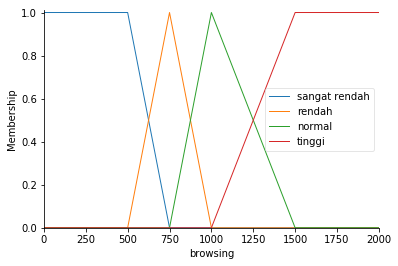

In [26]:
browsing.view()

##### Menampilkan plot membership function untuk variabel input download:

C:\Users\NOM\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


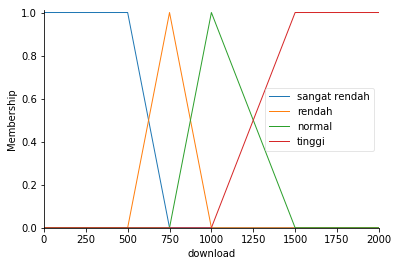

In [27]:
download.view()

##### Menampilkan plot membership function untuk variabel output limit browsing:

C:\Users\NOM\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


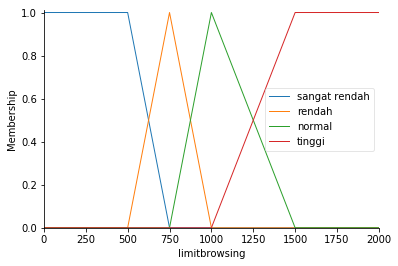

In [28]:
limitbrowsing.view()

##### Menampilkan membership function untuk variabel output limit download:

C:\Users\NOM\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


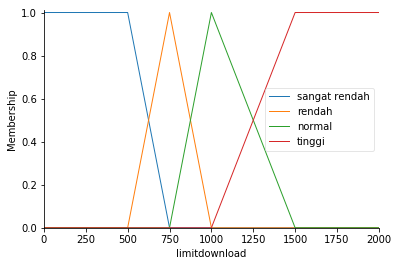

In [29]:
limitdownload.view()

# Inferencing

Mendefinisikan hubungan fuzzy antara variabel input dan output, dengan kata lain aturan-aturan ini dibentuk untuk menyatakan relasi antara input yang ada dengan output. Operator yang yang digunakan untuk menghubungkan antara dua input adalah operator AND, dan yang menetapkan antara input-output adalah IF-THEN. Dari 2 input dan 2 output fuzzy tersebut akan ditetapkan aturan-aturan berdasarkan nilai dari masing-masing input dan output. Dimana aturan-aturan tersebut merupakan penetapan dan akan menentukan status Max limit browsing dan max limitdownload . Dari 2 input memiliki 4 kondisi dan 2 output , didapatkan 16 rule. 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xf7d1ce8208>)

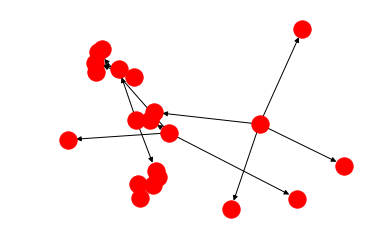

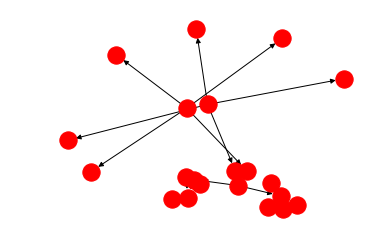

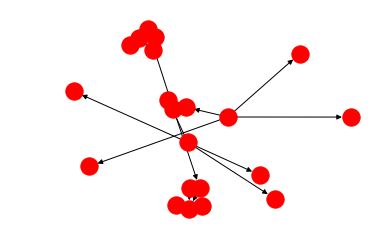

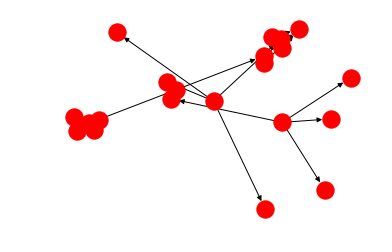

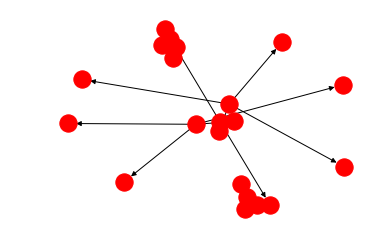

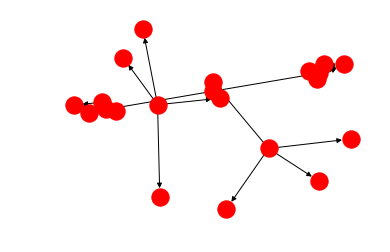

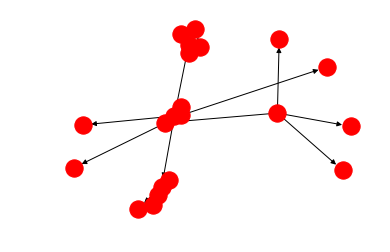

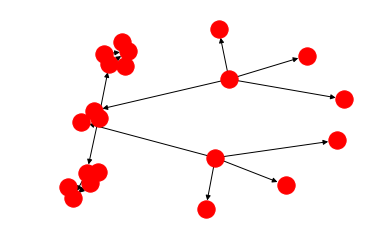

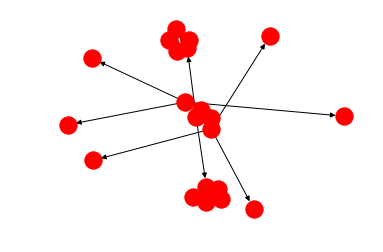

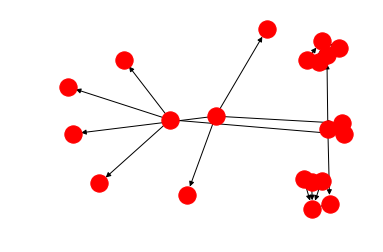

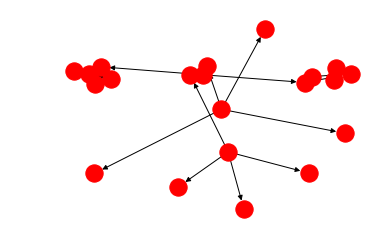

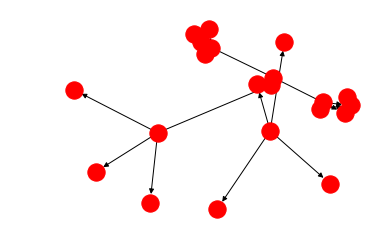

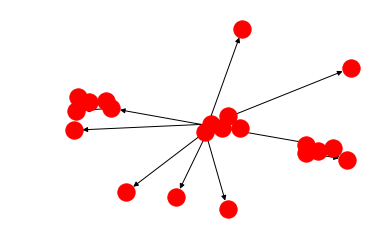

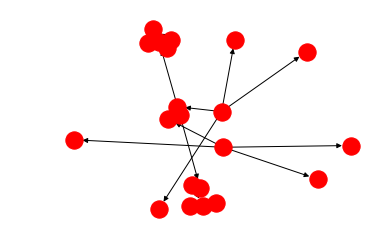

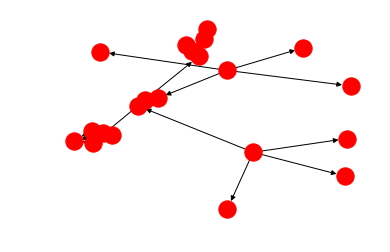

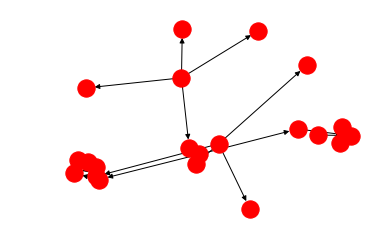

In [30]:
rule1 = ctrl.Rule(browsing['sangat rendah'] & download['sangat rendah'],[limitbrowsing['rendah'],limitdownload['sangat rendah']])
rule2 = ctrl.Rule(browsing['sangat rendah'] & download['rendah'],[limitbrowsing['rendah'],limitdownload['normal']])
rule3 = ctrl.Rule(browsing['sangat rendah'] & download['normal'],[limitbrowsing['normal'],limitdownload['rendah']])
rule4 = ctrl.Rule(browsing['sangat rendah'] & download['tinggi'],[limitbrowsing['rendah'],limitdownload['tinggi']])

rule5 = ctrl.Rule(browsing['rendah'] & download['sangat rendah'],[limitbrowsing['rendah'],limitdownload['normal']])
rule6 = ctrl.Rule(browsing['rendah'] & download['rendah'],[limitbrowsing['normal'],limitdownload['sangat rendah']])
rule7 = ctrl.Rule(browsing['rendah'] & download['normal'],[limitbrowsing['normal'],limitdownload['rendah']])
rule8 = ctrl.Rule(browsing['rendah'] & download['tinggi'],[limitbrowsing['normal'],limitdownload['tinggi']])

rule9 = ctrl.Rule(browsing['normal'] & download['sangat rendah'],[limitbrowsing['sangat rendah'],limitdownload['rendah']])
rule10 = ctrl.Rule(browsing['normal'] & download['rendah'],[limitbrowsing['tinggi'],limitdownload['normal']])
rule11 = ctrl.Rule(browsing['normal'] & download['normal'],[limitbrowsing['normal'],limitdownload['rendah']])
rule12 = ctrl.Rule(browsing['normal'] & download['tinggi'],[limitbrowsing['tinggi'],limitdownload['tinggi']])

rule13 = ctrl.Rule(browsing['tinggi'] & download['sangat rendah'],[limitbrowsing['sangat rendah'],limitdownload['sangat rendah']])
rule14 = ctrl.Rule(browsing['tinggi'] & download['rendah'],[limitbrowsing['rendah'],limitdownload['normal']])
rule15 = ctrl.Rule(browsing['tinggi'] & download['normal'],[limitbrowsing['normal'],limitdownload['tinggi']])
rule16 = ctrl.Rule(browsing['tinggi'] & download['tinggi'],[limitbrowsing['tinggi'],limitdownload['tinggi']])


rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()
rule11.view()
rule12.view()
rule13.view()
rule14.view()
rule15.view()
rule16.view()














# Rule Evaluation

In [31]:
agregat_rule = ctrl.ControlSystem([rule1, rule2, rule3, 
                                   rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, 
                                   rule12, rule13, rule14, rule15, rule16])

# Defuzzifikasi

In [32]:
max_limit = ctrl.ControlSystemSimulation(agregat_rule)

untuk input kita masukkan 
- input browsing = 700
- input download = 500

In [33]:
max_limit.input["browsing"] = 700
max_limit.input["download"] = 500

Melakukan perhitungan defuzzifikasi

In [34]:
max_limit.compute()
max_limit.output

OrderedDict([('limitbrowsing', 749.9999999999995),
             ('limitdownload', 878.730652403588)])

Melakukan Plotting fungsi keanggotaan setalah memasukkan input pada input browsing

C:\Users\NOM\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


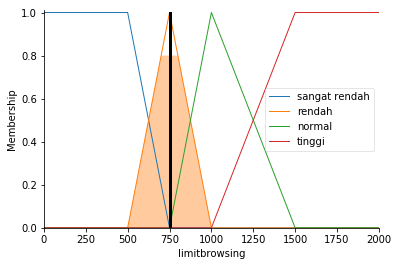

In [35]:
limitbrowsing.view(sim=max_limit)

Melakukan Plotting fungsi keanggotaan setalah memasukkan input pada input download

C:\Users\NOM\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


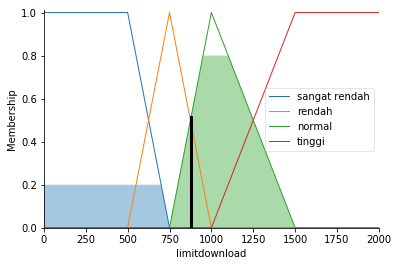

In [36]:
limitdownload.view(sim=max_limit)

# Perhitungan Manual

\begin{equation}
    browsing = 700 \\
    Masukkan\,nilai\,suhu\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,browsing\\
 \mu ['Sangat Rendah'](x) = \begin{cases}
    1, & \text{$x\leq500$}.\\
    (750 - x)/(750 - 500) , & \text{$500 \leq x \leq 750$}.\\
    0, & \text{$x\geq 750$}.\checkmark \\
  \end{cases}
  \\
  \mu['Rendah'](x)=\begin{cases}
    0, & \text{$x\leq 500 $ atau $x\geq1000$}.\\
    (x - 500)/(750 - 500) , & \text{$500 \leq x \leq 750$}.\\
    (1000 - x)/(1000 - 750) , & \text{$750 \leq x \leq 1000$}.\checkmark \\
  \end{cases}
  \\
  \mu['Normal'](x)=\begin{cases}
    0, & \text{$x\leq 500$ atau $x\geq1500$}.\\
    (x - 750)/(1000 - 750) , & \text{$750 \leq x \leq 1000$}.\\
    (1500 - x)/(1500 - 1000) , & \text{$1000 \leq x \leq 1500$}.\\
  \end{cases}
  \\
  \mu ['Tinggi'](x)=\begin{cases}
    0, & \text{$x\leq 1000$}.\\
    (x - 1000)/(1500 - 1000) , & \text{$1000 \leq x \leq 1500$}.\\
    1, & \text{$x\geq 2000$}.
  \end{cases}
\end{equation}


\begin{equation}
    \mu sangatRendah(700) = (b - x) / (b - a) \\
    \mu sangatRendah(700) = (750 - 700) / (750 - 500) \\
    \mu sangatRendah(700) = 0.2 \\
    \mu rendah(700) = (x - a) / (b - a) \\
    \mu rendah(700) = (700 - 500) / (750 - 500) \\
    \mu rendah(700) = 0.8 \\
\end{equation}

\begin{equation}
   download = 500 \\
  Masukkan\,nilai\,suhu\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\, download\\
 \mu ['Sangat Rendah'](x) = \begin{cases}
    1, & \text{$x\leq500$}.\\
    (750 - x)/(750 - 500) , & \text{$500 \leq x \leq 750$}.\\
    0, & \text{$x\geq 750$}.\checkmark \\
  \end{cases}
  \\
  \mu['Rendah'](x)=\begin{cases}
    0, & \text{$x\leq 500 $ atau $x\geq1000$}.\\
    (x - 500)/(750 - 500) , & \text{$500 \leq x \leq 750$}.\\
    (1000 - x)/(1000 - 750) , & \text{$750 \leq x \leq 1000$}.
  \end{cases}
  \\
  \mu['Normal'](x)=\begin{cases}
    0, & \text{$x\leq 500$ atau $x\geq1500$}.\\
    (x - 750)/(1000 - 750) , & \text{$750 \leq x \leq 1000$}.\\
    (1500 - x)/(1500 - 1000) , & \text{$1000 \leq x \leq 1500$}.\\
  \end{cases}
  \\
  \mu ['Tinggi'](x)=\begin{cases}
    0, & \text{$x\leq 1000$}.\\
    (x - 1000)/(1500 - 1000) , & \text{$1000 \leq x \leq 1500$}.\\
    1, & \text{$x\geq 2000$}.
  \end{cases}
\end{equation}


\begin{equation}
    \mu sangatRendah(500) = (b - x) / (b - a) \\
    \mu sangatRendah(500) = (750 - 500) / (750 - 500) \\
    \mu sangatRendah(500) = 1 \\ 
\end{equation}

#### Mencari nilai terkecil dari evaluasi rule 
1. IF Browsing sangat rendah AND download rendah THEN limit browsing rendah dan limit download normal

$$ \\ \alpha(predikat_1) = \mu Browsing\ Sangat\ Rendah \cap \mu Download\ Rendah $$
$$\alpha(predikat_1)   = min (\mu browsing[700], \mu download[500]) $$
$$ \alpha(predikat_1) = min (0.8; 1 ; ) $$
$$ \alpha(predikat_1) = 0,8 $$



2. IF Browsing sangat rendah AND download sangat rendah THEN limit Browsing rendah dan limit download sangat rendah
$$ \\ \alpha(predikat_1) = \mu Browsing\ Sangat\ Rendah \cap \mu Download\ Rendah $$
$$\alpha(predikat_1)   = min (\mu browsing[700], \mu download[500]) $$
$$ \alpha(predikat_1) = min (0.2; 1) $$
$$ \alpha(predikat_1) = 0,2 $$

#### Mencari nilai Xi dan Ai untuk output Limit Browsing
##### Berada Pada Rendah 

$
X1 = 500 + \frac{2}{3} (750 - 500) \\
X1 = 500 + 166,66 \\
            X1 = 666,66 \\ 
$

$
X2 = 700 + \frac{1}{3} (1000 - 750) \\
X2 = 750 + 83,33 \\
            X2 = 833,33 \\ 
$

$
A1 = \frac{1}{2}\ (250\ x\ 1) \\
A1 = 125 \\ 
$

$
A2= \frac{1}{2}\ (250\ x\ 1) \\
A2 = 125 \\ 
$

$
Hasil = \frac{\Sigma\ Xi\ Ai}{Ai}  
$

$
Hasil = \frac{(666,66\ x\ 125)\ +\ (833,33\ x\ 125)}{125\ +\ 125} \\
Hasil = \frac{ 187498,75}{250} \\
Hasil = 749.9999995
$

#### Mencari nilai Xi dan Ai untuk output Limit Download
##### Berada Pada Sangat Rendah dan Normal

$
X1 = \frac{1}{2} (750 - 1) \\
X1 = 374,5 \\
$


$
X2 = 750 + \frac{2}{3} (1000 - 750) \\
X2 = 750 + \frac{2}{3} (250) \\
X2 = 916,6 \\ 
$

$
X3 = 1000 + \frac{2}{3} (1500 - 1000) \\
X3 = 1000 + \frac{2}{3} (500) \\
X3 = 1166,6 \\ 
$

$
A1 = 750\ x\ 0,2 \\
A1 = 150 \\ 
$

$
A2 = \frac{1}{2}\ (250\ x\ 1) \\
A2 = 125 \\ 
$

$
A3 = \frac{1}{2}\ (500\ x\ 1) \\
A3 = 250 \\ 
$

$
Hasil = \frac{\Sigma\ Xi\ Ai}{Ai}  
$

$
Hasil = \frac{(374,5\ x\ 150)\ +\ (916,6\ x\ 125)\ +\ (1166,6\ +\ 250) }{(150\ +\ 125\ +\ 250)} \\
Hasil = \frac{462400}{525} \\
Hasil = 880,761905
$

##### Analisa:

Limit Browsing:
- Hasil perhitungan manual dan hasil pada Python tidak memimiliki selisih dan sama-sama mengasilkan Output 749.99999995

Limit Donwload:
- hasil perhitungan manual adalah 880,761905 dan hasil perhitungan pada python 878,730652403588
- selisih antara perhitungan manual dan hasil perhitungan paython adalah 2,0312526